In [ ]:
import numpy as np
import gzip
import random
import os
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(336)

def load_mnist(path, kind, subset=None):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz'%kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz'%kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)
    
    if subset is not None:
        selected_images, selected_labels = [], []
        for label in range(10):
            indices = np.where(labels == label)[0]
            selected_indices = np.random.choice(indices, subset, replace=False)
            selected_images.append(images[selected_indices])
            selected_labels.append(labels[selected_indices])
        images = np.concatenate(selected_images, axis=0)
        labels = np.concatenate(selected_labels, axis=0)

        paired = list(zip(images, labels))
        random.shuffle(paired)
        images, labels = zip(*paired)
    
    return np.array(images), np.array(labels)

# Use a subset of the dataset.
X_train, y_train = load_mnist('./data/', kind='train', subset=100)
X_test, y_test = load_mnist('./data/', kind='t10k', subset=20)

The label index of this image is: 9
The label name of this graph is: Ankle boot


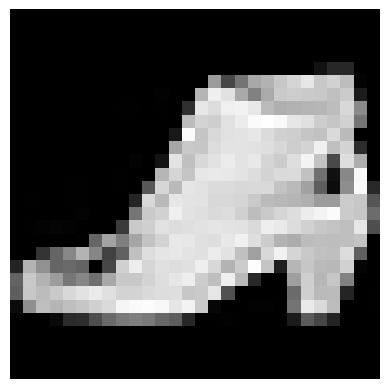

In [36]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
idx = random.choice(range(0,len(X_test)))
print(f"The label index of this image is: {y_test[idx]}")
print(f"The label name of this graph is: {label_names[y_test[idx]]}")

plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Use each pixel to represent different features.
X_train = pd.DataFrame(X_train, columns=[f"pixel_{i}" for i in range(X_train.shape[1])])
X_test = pd.DataFrame(X_test, columns=[f"pixel_{i}" for i in range(X_test.shape[1])])

#### **Task1: Decision Tree Classifier**
Train Random Forest Classification models with different max_depth (=1,2,...,9).

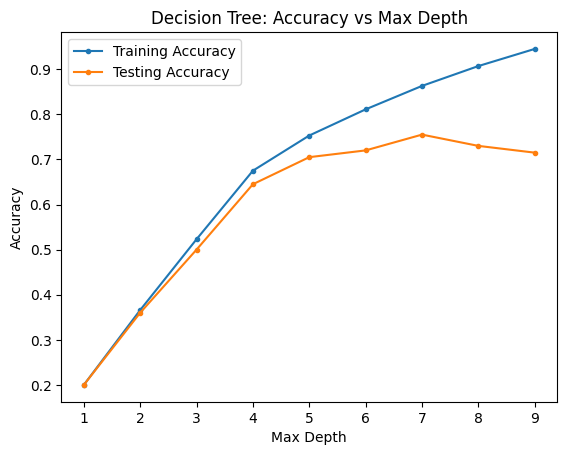

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
train_acc_dt = []
test_acc_dt  = []
depth_list = range(1, 10)

for depth in depth_list:
    dt = DecisionTreeClassifier(max_depth = depth, random_state = 336)
    dt.fit(X_train, y_train)
    train_acc_dt.append(accuracy_score(y_train, dt.predict(X_train)))
    test_acc_dt.append(accuracy_score(y_test, dt.predict(X_test)))

plt.plot(depth_list, train_acc_dt, marker=".", label='Training Accuracy')
plt.plot(depth_list, test_acc_dt, marker=".", label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs Max Depth')
plt.legend()
plt.show()

#### **Task2: Random Forest Classification**
Train Random Forest Classification models with different max_depth (=1,2,...,9).

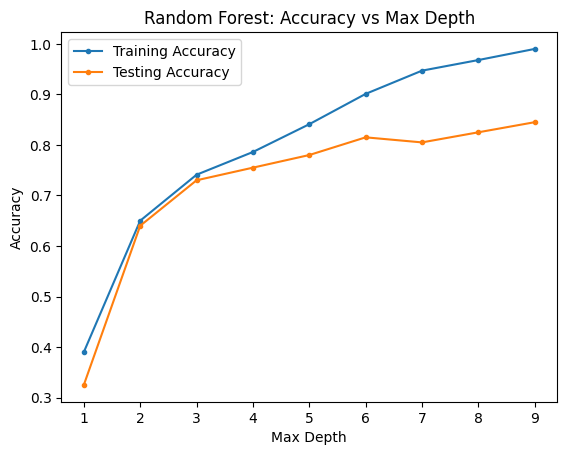

In [40]:
from sklearn.ensemble import RandomForestClassifier
train_acc_rf = []
test_acc_rf  = []
depth_list = range(1, 10)

for depth in depth_list:
    rf = RandomForestClassifier(max_depth = depth, random_state = 336)
    rf.fit(X_train, y_train)
    train_acc_rf.append(accuracy_score(y_train, rf.predict(X_train)))
    test_acc_rf.append(accuracy_score(y_test, rf.predict(X_test)))

plt.plot(depth_list, train_acc_rf, marker=".", label='Training Accuracy')
plt.plot(depth_list, test_acc_rf, marker=".", label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest: Accuracy vs Max Depth')
plt.legend()
plt.show()

#### **Task3: Bagging and Random Forest Classification**
Train both Bagging and Random Forest Classification models with different n_estimators (=10,20,50,100). 

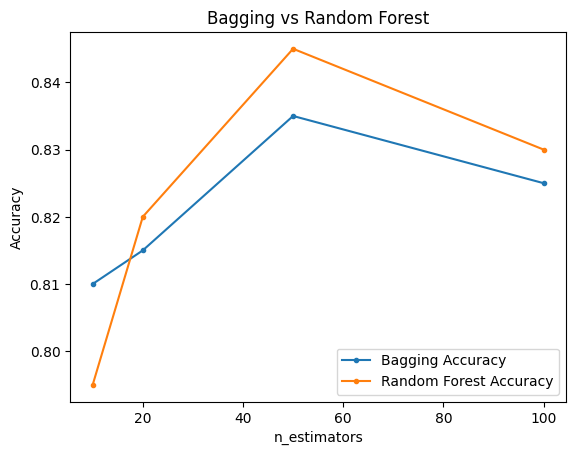

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
n_estimators_list = [10, 20, 50, 100]
bagging_test_acc = []
rf_test_acc = []

for n in n_estimators_list:

    bagging = BaggingClassifier(n_estimators = n, max_samples = 0.8, max_features = 0.8, random_state = 336)
    bagging.fit(X_train, y_train)
    bagging_test_acc.append(accuracy_score(y_test, bagging.predict(X_test)))
    
    rf = RandomForestClassifier(n_estimators = n, random_state = 336)
    rf.fit(X_train, y_train)
    rf_test_acc.append(accuracy_score(y_test, rf.predict(X_test)))

plt.plot(n_estimators_list, bagging_test_acc, marker=".", label='Bagging Accuracy')
plt.plot(n_estimators_list, rf_test_acc, marker=".", label='Random Forest Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Bagging vs Random Forest')
plt.legend()
plt.show()

#### **Task4:**
Find the best parameter combination from \[n_estimators=50/100/200, max_depth=5/10/20/50\] by 4-fold cross validation. 

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 50]
}

rf = RandomForestClassifier(random_state = 336)
grid_search = GridSearchCV(rf, param_grid, cv = 4, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
test_acc = accuracy_score(y_test, best_rf.predict(X_test))

print("Best params:", grid_search.best_params_)
print("Test Accuracy with Best Model: ", test_acc)

Best params: {'max_depth': 20, 'n_estimators': 200}
Test Accuracy with Best Model:  0.835
